In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
delivery_data=pd.read_csv('deliveries.csv') # Bowl by Bowl data

match_data=pd.read_csv('matches-1.csv')# IPL(Indian premier League) Match Data from 2008 and 2016.

In [9]:
match_data.shape

(756, 18)

In [10]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [17]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
biggest_win=match_data['win_by_runs'].max()
teams_biggest_win=[]

f=match_data.loc[match_data['win_by_runs']==biggest_win]

teams_biggest_win.append((str(f['season'].tolist()[0])))

teams_biggest_win.append((str(f['venue'].tolist()[0])))

teams_biggest_win.append(str(f['team1'].tolist()[0]))

teams_biggest_win.append(str(f['team2'].tolist()[0]))


teams_biggest_win.append(str(f['winner'].tolist()[0]))


tie_matches_no=match_data.loc[match_data['result']=='tie']

In [12]:
f=match_data.loc[match_data['dl_applied']==1]
season_number=f['season'].value_counts()
dl_stadium=f['venue'].value_counts()

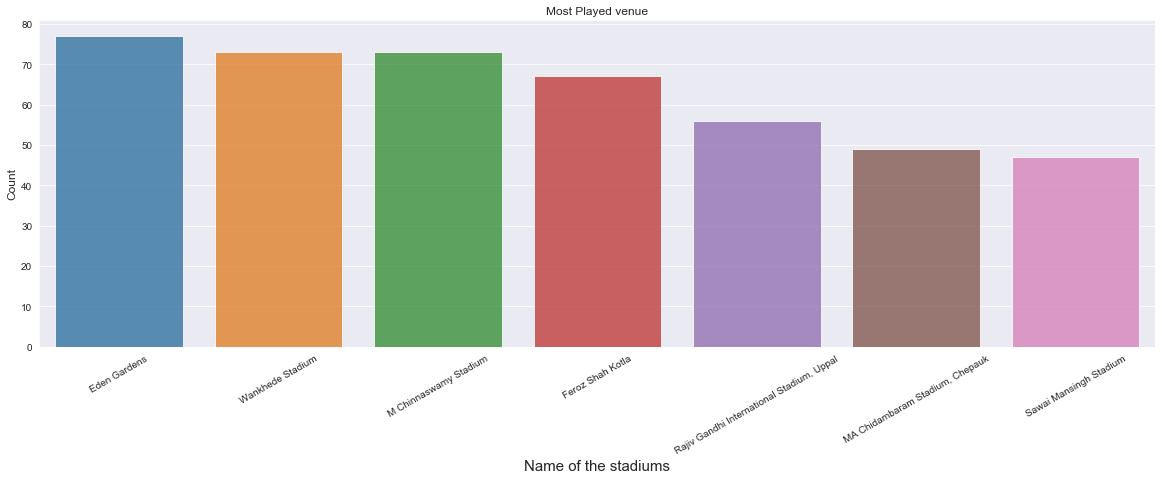

In [13]:
sns.set_style("darkgrid")# to make background with grid
ls=match_data['venue'].value_counts().sort_values(ascending=False)
ls=ls[:7]
plt.figure(figsize=(20,6))
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()

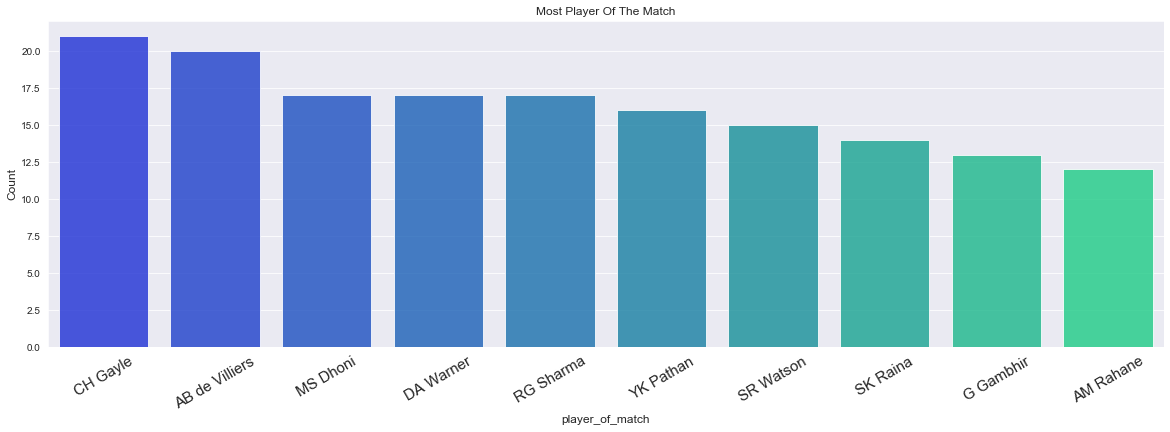

In [14]:
man_of_match=match_data['player_of_match'].value_counts()
man_of_match=man_of_match[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
man_of_matches=sns.barplot(man_of_match.index, man_of_match.values, alpha=0.8,palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)
man_of_matches.set_xticklabels(rotation=30,labels=man_of_match.index,fontsize=15)
plt.show()

Text(0.5, 0, 'Season')

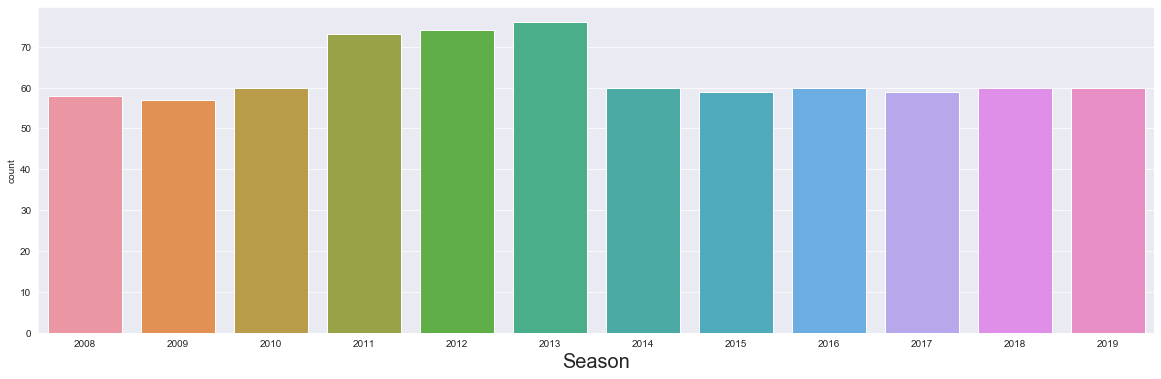

In [15]:
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=match_data)
plt.xlabel('Season',fontsize=20)

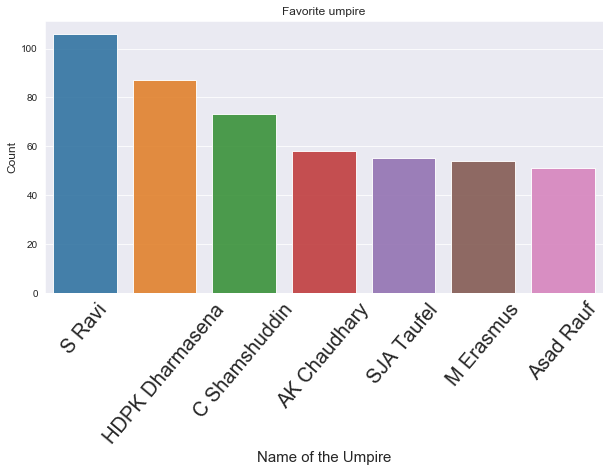

In [16]:
ump=pd.concat([match_data['umpire1'],match_data['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:7]
plt.figure(figsize=(10,5))
Most_umpired =sns.barplot(x=ump.index, y=ump.values, alpha=0.9)

plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=50,labels=ump.index,fontsize=20)
plt.show()

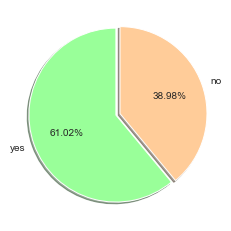

In [25]:
match_2019=match_data[match_data['season']==2019]
df=match_2019[match_2019['toss_winner']==match_2019['winner']]
slices=[len(df),(59-len(df))]# because Toal 59 matches were played in 2017
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

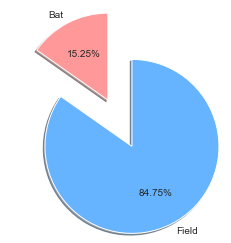

In [28]:
dfs=match_data[(match_data['toss_decision']=='field') & (match_data['season']==2019) ]
labels=['Bat','Field']
slices=[59-len(dfs),len(dfs)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

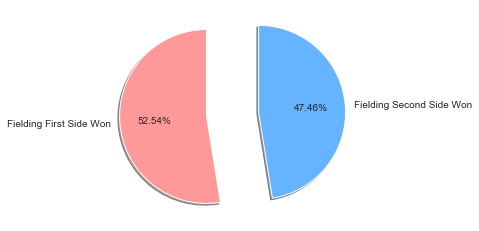

In [29]:
dfd=match_2019[(match_2019['toss_decision']=='field') & (match_2019['toss_winner']==match_2019['winner'])]
labels=['Fielding First Side Won','Fielding Second Side Won']
slices=[len(dfd),59-len(dfd)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

In [35]:
def comparator(team1):
    teams=list(match_data.team1.unique())# you can take team2 here also 
    teams.remove(team1)
    opponents=teams.copy()
    mt1=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))# each time comparing each opponent team and the team we are looking for
        #print(mask)
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T# to_frame to convert to DataFrame and T is used to Transpose
        print(mt2)
        print("---------------------------")

In [36]:
comparator('Kolkata Knight Riders')

        Chennai Super Kings  Kolkata Knight Riders
winner                   13                      7
---------------------------
        Rajasthan Royals  Kolkata Knight Riders
winner                10                     10
---------------------------
        Mumbai Indians  Kolkata Knight Riders
winner              19                      6
---------------------------
        Kolkata Knight Riders  Deccan Chargers
winner                      7                2
---------------------------
        Kolkata Knight Riders  Kings XI Punjab
winner                     17                8
---------------------------
        Kolkata Knight Riders  Royal Challengers Bangalore
winner                     14                           10
---------------------------
        Kolkata Knight Riders  Delhi Daredevils
winner                     13                 8
---------------------------
        Kochi Tuskers Kerala
winner                     2
---------------------------
        Kolkata Knight Rid

In [24]:
match_data.loc[match_data.season==2019].shape# this shows 59 matches were played in season 2017

most_maidens=delivery_data.groupby(['match_id','inning','over'])

# most_maidens.first()
list_of_most_maidens=[]
for match in range(1,60): # to iterate over each match total 59 matches
    for inning in range(1,3):# to iterate over each innings there are 2 innings in a match
        for over in range(1,21):# to iterate over maximum 20 overs in an innings
            
            try:# try block beacuse not every inning or every match is perfectly divided into 2 innings of 20 overs each in some matches due to rain or some other reason overswere reduced 
                #or even innings was dismissed
                if ((most_maidens.get_group((match,inning,over))['wide_runs'].sum()>0) + 
                    (most_maidens.get_group((match,inning,over))['noball_runs'].sum()>0)==most_maidens.get_group((match,inning,over))['total_runs'].sum()):
                    bowler=list(most_maidens.get_group((match,inning,over))['bowler'].unique())[0]
                    list_of_most_maidens.append(bowler)
                    
                    
                else:
                    pass
                
            except:
                continue


from statistics import mode 
def most_common(List): 
    return(mode(List)) 
    
print(str(most_common(list_of_most_maidens))+ " bowled most " + str(list_of_most_maidens.count(most_common(list_of_most_maidens))) + " maiden overs in 2019")  

JD Unadkat bowled most 3 maiden overs in 2019
